### **Time series analysis**

### **Problem Statement:**

“Global Mart” is an online store super giant having worldwide operations. It takes orders and delivers across the globe and deals with all the major product categories - consumer, corporate & home office.

### **Objective:**
 
Global Mart wants to finalise the plan for the next 6 months.  So, it wants to forecast the sales and the demand for the next 6 months, that would help Global Mart manage the revenue and inventory accordingly.


In [2]:
# Supress Warnings.

import warnings

warnings.filterwarnings('ignore')

In [3]:
# Load the following packages.

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from scipy.stats import boxcox
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

### **Understanding the data**

In [4]:
# Load the given data.

global_superstore = pd.read_csv("Global Superstore.csv")

In [5]:
# View df "global_superstore".

global_superstore

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,20-06-2014,24-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,02-12-2013,02-12-2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,18-02-2012,22-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,S�o Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium


### **Data preparation**

In [6]:
# Creating a new column as "Market_segement".

global_superstore['Market_Segment'] = global_superstore['Market'] + '_' + global_superstore['Segment']

global_superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Market_Segment
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,US_Consumer
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,APAC_Corporate
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,APAC_Consumer
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,EU_Home Office
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,Africa_Consumer


### **Exploratory Data Analysis**

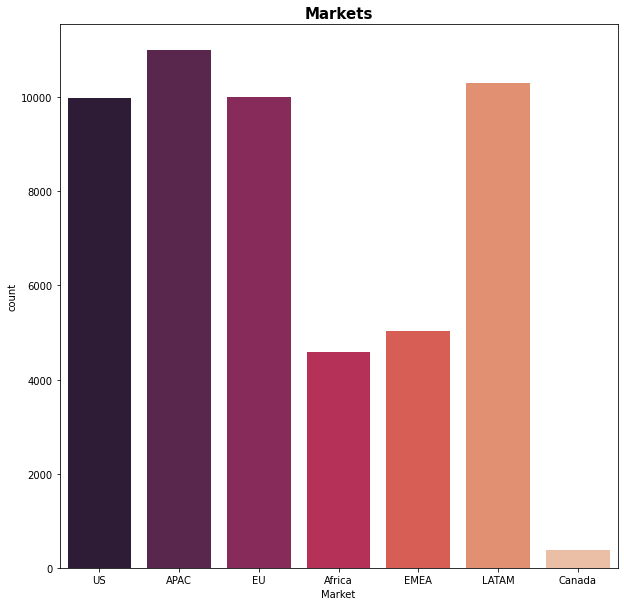

In [7]:
# Understanding different Markets.

plt.figure(figsize = (10,10))

sns.countplot(global_superstore['Market'], palette = 'rocket')

plt.title('Markets', fontweight = 'bold', size = 15)

plt.show()

# There are seven different markets.

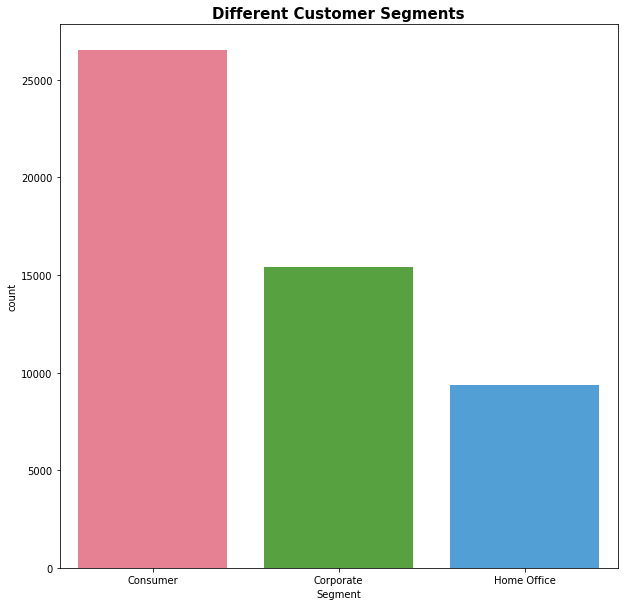

In [8]:
# Understanding different Segments.

plt.figure(figsize = (10,10))

sns.countplot(global_superstore['Segment'], palette = 'husl')

plt.title('Different Customer Segments', fontweight = 'bold', size = 15)

plt.show()

# There are three customer segments.

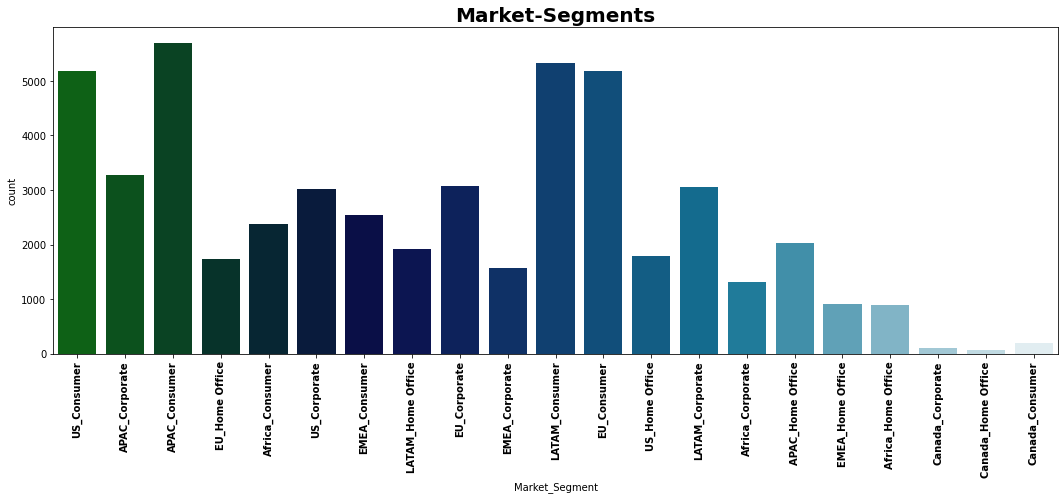

In [9]:
# Understanding different Market-Segments.

plt.figure(figsize = (18,6))

sns.countplot(global_superstore['Market_Segment'], palette = 'ocean')

plt.title('Market-Segments', fontweight = 'bold', size = 20)

plt.xticks(rotation = 90, fontweight = "bold")

plt.show()

# There are 21 Market-Segments.

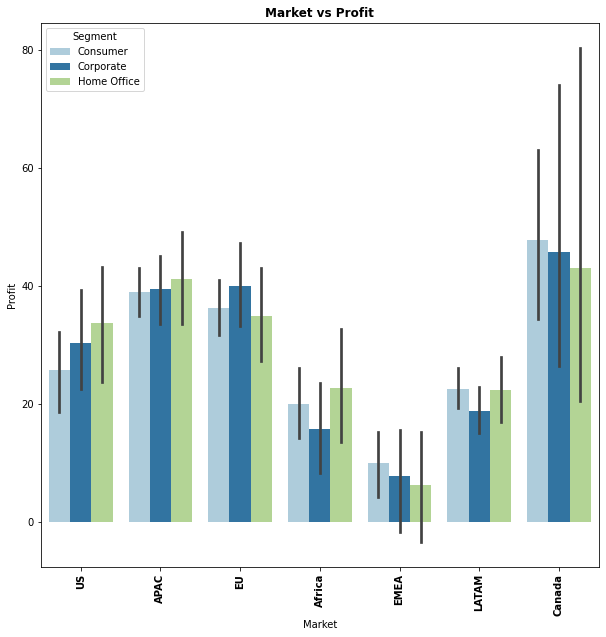

In [10]:
# Understanding profits for different Markets and Segments.

plt.figure(figsize = (10,10))

sns.barplot(x = 'Market', y = 'Profit', hue = 'Segment', data = global_superstore, palette = 'Paired')

plt.title('Market vs Profit', fontweight = 'bold')

plt.xticks(rotation = 90, fontweight = "bold")

plt.show()

# Markets "APAC" and "Canada" have more profit.

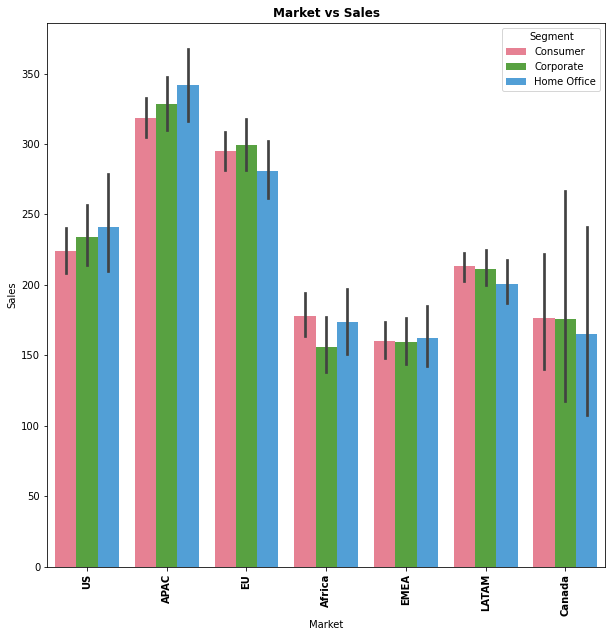

In [11]:
# Understanding sales of different Markets and Segments.

plt.figure(figsize = (10,10))

sns.barplot(x = 'Market', y = 'Sales', hue = 'Segment', data = global_superstore, palette = 'husl')

plt.title('Market vs Sales', fontweight = 'bold')

plt.xticks(rotation = 90, fontweight = "bold")

plt.show()

# Market "APAC" has more sales across all three segements.

In [12]:
# Dropping "Market" and "Segment" columns.

global_superstore = global_superstore.drop(['Market','Segment'], axis = 1)

In [13]:
# Converting "Order Date" to Month-Year format.

global_superstore['Order Date'] = pd.to_datetime(global_superstore['Order Date']).dt.to_period('m')

global_superstore = global_superstore.sort_values(by = ['Order Date'])

global_superstore

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,City,State,Country,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Market_Segment
15262,16727,ES-2011-5268439,2011-01,03-02-2011,Second Class,GH-14485,Gene Hale,La Rochelle,Poitou-Charentes,France,...,Office Supplies,Art,"Binney & Smith Pencil Sharpener, Easy-Erase",139.6500,5,0.00,15.3000,19.23,High,EU_Corporate
26744,19594,IT-2011-2536577,2011-01,29-01-2011,Second Class,AS-10240,Alan Shonely,Montpellier,Languedoc-Roussillon,France,...,Office Supplies,Art,"BIC Highlighters, Water Color",88.4400,4,0.00,15.8400,7.14,Medium,EU_Consumer
48614,17090,ES-2011-3060159,2011-01,29-01-2011,Standard Class,CP-12340,Christine Phan,Bonn,North Rhine-Westphalia,Germany,...,Office Supplies,Binders,"Avery Binder Covers, Recycled",11.4300,1,0.00,4.1100,0.62,Medium,EU_Corporate
9417,2097,MX-2011-149272,2011-01,05-12-2011,Standard Class,CV-12295,Christina VanderZanden,Sucre,Chuquisaca,Bolivia,...,Furniture,Bookcases,"Sauder Corner Shelving, Traditional",491.0000,5,0.00,122.7000,35.15,Medium,LATAM_Consumer
48590,40002,US-2011-132745,2011-01,05-10-2011,Standard Class,NF-18475,Neil Franz�sisch,Reno,Nevada,United States,...,Office Supplies,Fasteners,Sterling Rubber Bands by Alliance,4.7100,1,0.00,0.0000,0.63,High,US_Home Office
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26850,43467,MG-2014-1310,2014-12,17-03-2014,Second Class,GG-4650,Greg Guthrie,Ulan Bator,Ulaanbaatar,Mongolia,...,Office Supplies,Envelopes,"Ames Clasp Envelope, with clear poly window",42.9600,4,0.00,5.0400,7.08,High,EMEA_Corporate
19243,45924,TU-2014-6470,2014-12,28-12-2014,Second Class,JG-5115,Jack Garza,Ankara,Ankara,Turkey,...,Office Supplies,Binders,"Wilson Jones Binding Machine, Durable",80.7360,4,0.60,-117.1440,13.33,High,EMEA_Consumer
7829,20334,ID-2014-76618,2014-12,14-08-2014,Second Class,RB-19330,Randy Bradley,Perth,Western Australia,Australia,...,Office Supplies,Binders,"Avery Binding Machine, Clear",608.5800,14,0.10,0.0000,43.25,High,APAC_Consumer
21163,20842,IN-2014-32812,2014-12,31-12-2014,Standard Class,Co-12640,Corey-Lock,Yangon,Yangon,Myanmar (Burma),...,Technology,Copiers,"Hewlett Ink, High-Speed",185.0688,2,0.37,-102.8712,11.27,Medium,APAC_Consumer


In [14]:
# Generating monthly transaction data.

monthly_profit = global_superstore.pivot_table(index = 'Order Date', values = 'Profit', columns = 'Market_Segment' , aggfunc = 'sum')

monthly_profit

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.5680,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.2550,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.7450,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.3710,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.3100,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781
2011-06,5231.0316,4550.5506,264.6204,-929.148,-400.917,-727.611,7.50,40.08,23.40,745.518,...,551.208,4135.4460,2214.9660,1580.4495,-115.27088,3248.31820,324.38564,2414.4710,447.1375,208.4844
2011-07,1928.5449,2322.9585,3261.9522,787.158,105.597,-318.942,NaN,509.19,8.40,-333.285,...,-2114.334,602.7330,1394.9100,463.4070,2344.33328,-186.83332,298.97200,-2620.8365,648.1498,1636.2932
2011-08,1101.5235,3137.2923,2187.2787,-387.558,-712.866,1999.050,23.88,NaN,NaN,1344.744,...,-218.802,2264.9640,4390.4490,350.1180,2270.28272,317.83228,660.28524,-548.0292,1910.2192,700.9315
2011-09,3088.9449,2040.2007,1221.6693,274.701,832.434,239.550,181.29,52.14,18.06,61.575,...,582.318,6129.7185,2704.1565,2891.2710,1737.60452,-523.86568,696.95344,9813.4142,-262.5736,676.0368


In [15]:
# Calculating Coefficient of Variation for profit across all 21 market segments.

mean = np.mean(monthly_profit)

std = np.std(monthly_profit)

var_df = pd.DataFrame(mean)

var_df['std'] = std

var_df['CoV'] = std/mean

var_df = var_df.reset_index()

var_df.columns = ['Market_Segment', 'Mean', 'Std', 'CoV']

var_df.sort_values(by = 'CoV', ascending = True, inplace = True)

var_df

,Market_Segment,Mean,Std,CoV
1,APAC_Corporate,2702.859058,1404.913309,0.519788
0,APAC_Consumer,4642.032508,2629.498148,0.566454
12,EU_Consumer,3930.993906,2279.300444,0.579828
15,LATAM_Consumer,2513.186082,1714.873286,0.682350
13,EU_Corporate,2570.707906,1848.968233,0.719245
16,LATAM_Corporate,1205.737945,986.584569,0.818241
18,US_Consumer,2794.150192,2614.508468,0.935708
19,US_Corporate,1916.231958,1849.855447,0.965361
14,EU_Home Office,1265.584469,1249.087651,0.986965
2,APAC_Home Office,1738.442787,1720.978588,0.989954


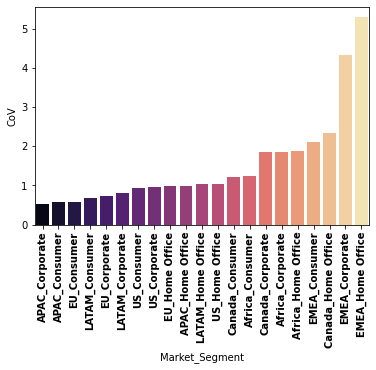

In [16]:
# Plotting Coefficient of variance of 21 market segments.

sns.barplot(x = 'Market_Segment', y = 'CoV', data = var_df, palette = 'magma')

plt.xticks(rotation = 90, fontweight = "bold")

plt.show()

**"APAC Consumer"** has least coefficient of variation. Hence it is the most profitable Market-Segment.

In [17]:
# Converting "Order Date" to "timestamp".

global_superstore['Order Date'] = global_superstore['Order Date'].astype(str)

global_superstore['Order Date'] = pd.to_datetime(global_superstore['Order Date'])

In [18]:
# Subsetting the data to retain only data related to the most profitable market segment i.e. "APAC_Consumer".

APAC_consumer = global_superstore[(global_superstore.Market_Segment == 'APAC_Consumer')]

In [19]:
# Creating different dataframes to contain "Sales" and "Quantity" related data.

APAC_consumer_sales = pd.DataFrame(APAC_consumer.groupby("Order Date")['Sales'].sum())

APAC_consumer_quantity = pd.DataFrame(APAC_consumer.groupby("Order Date")['Quantity'].sum())

### **Time Series Analysis**

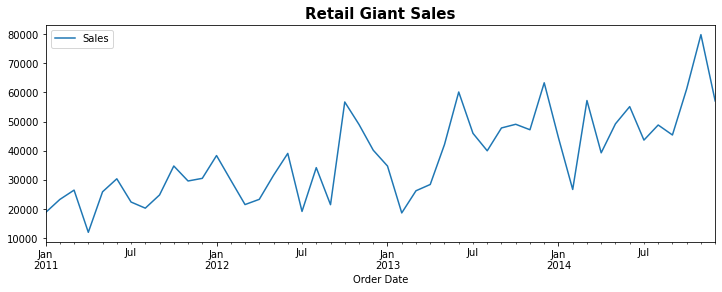

In [20]:
# Visulalize the time series.

APAC_consumer_sales.plot(figsize = (12, 4))

plt.legend(loc = 'best')

plt.title('Retail Giant Sales', fontweight = 'bold', size = 15)

plt.show(block = False)

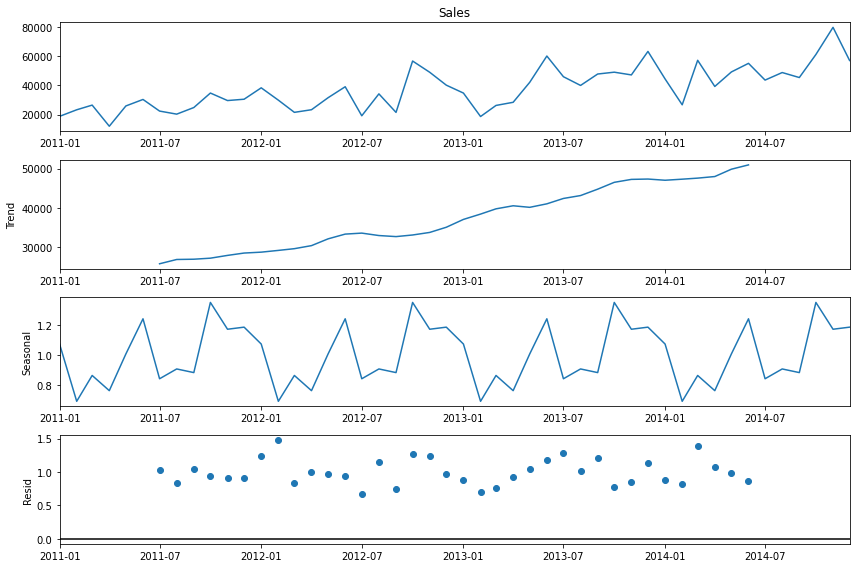

In [21]:
# Decomposing the time series.

rcParams['figure.figsize'] = 12, 8

decomposition = sm.tsa.seasonal_decompose(APAC_consumer_sales.Sales, model = 'multiplicative')

fig = decomposition.plot()

plt.show()

In [22]:
# Splitting data into train and test data.

train = APAC_consumer_sales.head(42)

test = APAC_consumer_sales.tail(6)

### **Auto Regressive Model (AR)**

Let's check if the given time series is stationary or not. This can be done by using two methods as:
1. Augmented Dickey-Fuller (ADF) test.
2. Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test.

**ADF test:**

* Null Hypothesis (H0): The series is not stationary  if p−value > 0.05. 
* Alternate Hypothesis (H1): The series is stationary if p−value <= 0.05.

**KPSS test:**

* Null Hypothesis (H0): The series is stationary if p−value > 0.05.
* Alternate Hypothesis (H1): The series is not stationary if p−value <= 0.05.

In [23]:
# ADF test.

test_adf = adfuller(APAC_consumer['Sales'])

print('ADF Statistic: %f' % test_adf[0])

print('Critical Values @ 0.05: %.2f' % test_adf[4]['5%'])

print('p-value: %f' % test_adf[1]) 

# The series is stationary.

ADF Statistic: -76.032064
Critical Values @ 0.05: -2.86
p-value: 0.000000


In [24]:
# KPSS test.

test_kpss = kpss(APAC_consumer_sales['Sales'])

print('KPSS Statistic: %f' % test_kpss[0])

print('Critical Values @ 0.05: %.2f' % test_kpss[3]['5%'])

print('p-value: %f' % test_kpss[1])

# The series is not stationary.

KPSS Statistic: 0.577076
Critical Values @ 0.05: 0.46
p-value: 0.024720


Let's convert this non-stationary series into stationary series are by applying Differencing and Transformation.

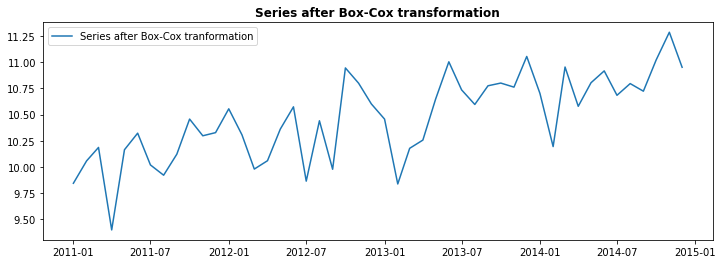

In [25]:
# Box-Cox Transformation,

boxcox_df = pd.Series(boxcox(APAC_consumer_sales['Sales'], lmbda = 0), index = APAC_consumer_sales.index)

plt.figure(figsize = (12,4))

plt.plot(boxcox_df, label = 'Series after Box-Cox tranformation')

plt.legend(loc = 'best')

plt.title('Series after Box-Cox transformation', fontweight = 'bold')

plt.show()

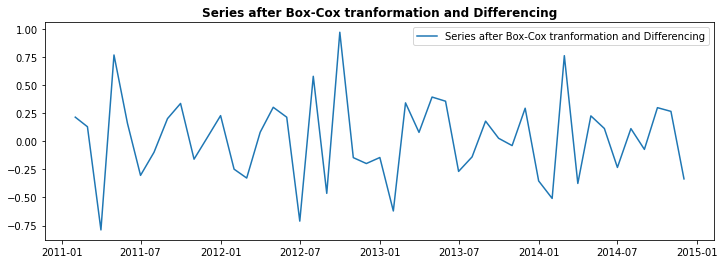

In [26]:
# Applying Differencing to remove both Trend and seasonality in a time series.

diff_df = pd.Series(boxcox_df - boxcox_df.shift(), APAC_consumer_sales.index)

plt.figure(figsize = (12,4))

plt.plot(diff_df, label = 'Series after Box-Cox tranformation and Differencing')

plt.legend(loc = 'best')

plt.title('Series after Box-Cox tranformation and Differencing', fontweight = 'bold')

plt.show()

In [27]:
# Checking if the are any missing values.

diff_df.isnull().sum()

1

In [28]:
# Removing missing values.

diff_df.dropna(inplace = True)

In [29]:
# Converting series to dataframe.

diff_df = diff_df.to_frame()

In [30]:
# Checking for stationarity.

test_adf = adfuller(diff_df)

print('ADF Statistic: %f' % test_adf[0])

print('Critical Values @ 0.05: %.2f' % test_adf[4]['5%'])

print('p-value: %f' % test_adf[1])

# The series is now stationary.

ADF Statistic: -4.535011
Critical Values @ 0.05: -2.95
p-value: 0.000170


In [31]:
# Checking for stationarity.

test_kpss = kpss(diff_df)

print('KPSS Statistic: %f' % test_kpss[0])

print('Critical Values @ 0.05: %.2f' % test_kpss[3]['5%'])

print('p-value: %f' % test_kpss[1])

# The series is now stationary.

KPSS Statistic: 0.156456
Critical Values @ 0.05: 0.46
p-value: 0.100000


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


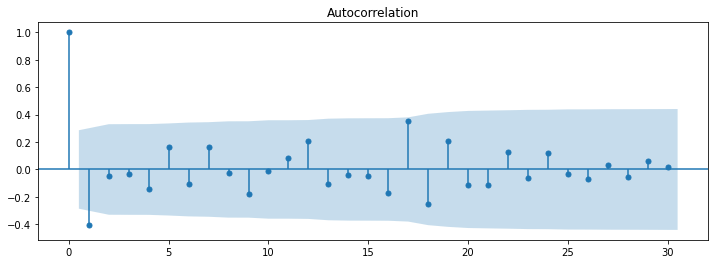

In [32]:
# Plotting Autocorrelation plot.

plt.figure(figsize = (12,4))

plot_acf(diff_df, ax = plt.gca(), lags = 30)

plt.show()

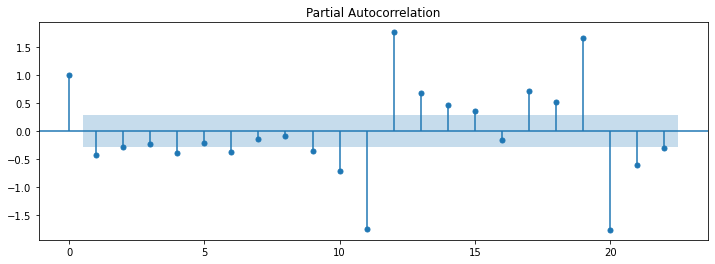

In [33]:
# Plotting Partial autocorrelation plot.

plt.figure(figsize = (12,4))

plot_pacf(diff_df, ax = plt.gca(), lags = 22)

plt.show()

In [34]:
# Splitting data into train and test.

boxcox_train = boxcox_df.head(42)

boxcox_test = boxcox_df.tail(6)

diff_train = diff_df.head(41)

diff_test = diff_df.head(6)

### **Auto Regressive Model (AR)**

In [35]:
# Building Auto Regressive model.

model = ARIMA(diff_train, order = (1, 0, 0))

model_fit = model.fit()

print(model_fit.params)

const      0.024255
ar.L1.0   -0.406729
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [36]:
# Making forecasts using AR model.

y_pred = diff_df

y_pred['Prediction'] = model_fit.predict(diff_df.index.min(), diff_df.index.max())

y_pred['Prediction_cumsum'] = y_pred['Prediction'].cumsum()

y_pred['Prediction_cumsum'] = y_pred['Prediction_cumsum'].add(boxcox_df[0])

y_pred['Forecast'] = np.exp(y_pred['Prediction_cumsum'])

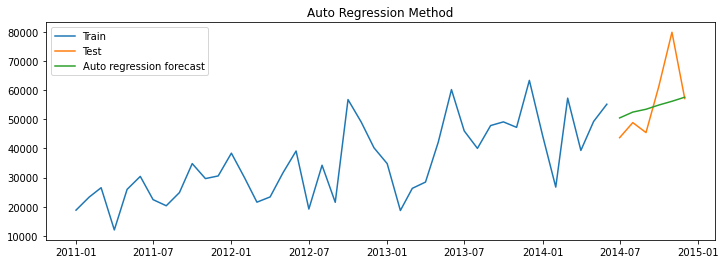

In [37]:
# Plotting forecast made by AR model.

plt.figure(figsize = (12,4))

plt.plot(train['Sales'], label = 'Train')

plt.plot(test['Sales'], label = 'Test')

plt.plot(y_pred['Forecast'][test.index.min():], label = 'Auto regression forecast')

plt.legend(loc = 'best')

plt.title('Auto Regression Method')

plt.show()

In [38]:
# Calculating RMSE and MAPE.

rmse = np.sqrt(mean_squared_error(test['Sales'], y_pred['Forecast'][test.index.min():])).round(2)

mape = np.round(np.mean(np.abs(test['Sales']-y_pred['Forecast'][test.index.min():])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Auto Regression'], 'MAPE':[mape], 'RMSE':[rmse]})

results = results[['Method', 'RMSE', 'MAPE']]

results

,Method,RMSE,MAPE
0,Auto Regression,10985.28,13.56


### **Moving average Model (MA)**

In [39]:
# Building Moving Average model.

model = ARIMA(diff_train, order = (0, 0, 1))

model_fit = model.fit()

print(model_fit.params)

const      0.021415
ma.L1.0   -1.000000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [40]:
# Making forecasts using MA model.

y_pred = diff_df

y_pred['Prediction'] = model_fit.predict(diff_df.index.min(), diff_df.index.max())

y_pred['Prediction_cumsum'] = y_pred['Prediction'].cumsum()

y_pred['Prediction_cumsum'] = y_pred['Prediction_cumsum'].add(boxcox_df[0])

y_pred['Forecast'] = np.exp(y_pred['Prediction_cumsum'])

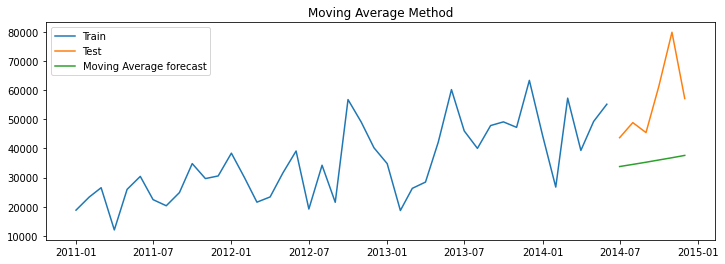

In [42]:
# Plotting forecasts made by MA model.

plt.figure(figsize = (12,4))

plt.plot(train['Sales'], label = 'Train')

plt.plot(test['Sales'], label = 'Test')

plt.plot(y_pred['Forecast'][test.index.min():], label = 'Moving Average forecast')

plt.legend(loc = 'best')

plt.title('Moving Average Method')

plt.show()

In [43]:
# Calculating RMSE and MAPE.

rmse = np.sqrt(mean_squared_error(test['Sales'], y_pred['Forecast'][test.index.min():])).round(2)

mape = np.round(np.mean(np.abs(test['Sales']-y_pred['Forecast'][test.index.min():])/test['Sales'])*100,2)

model_results = pd.DataFrame({'Method':['Moving Average'], 'MAPE':[mape], 'RMSE':[rmse]})

results = pd.concat([results, model_results])

results = results[['Method', 'RMSE', 'MAPE']]

results

,Method,RMSE,MAPE
0,Auto Regression,10985.28,13.56
0,Moving Average,23360.02,33.93


### **Auto Regressive Moving Average Model (ARMA)**

In [44]:
# Building ARMA model.

model = ARIMA(diff_train, order = (1, 0, 1))

model_fit = model.fit()

print(model_fit.params)

const      0.02147
ar.L1.0    0.07458
ma.L1.0   -1.00000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [45]:
# Making forecasts using ARMA model.

y_pred = diff_df

y_pred['Prediction'] = model_fit.predict(diff_df.index.min(), diff_df.index.max())

y_pred['Prediction_cumsum'] = y_pred['Prediction'].cumsum()

y_pred['Prediction_cumsum'] = y_pred['Prediction_cumsum'].add(boxcox_df[0])

y_pred['Forecast'] = np.exp(y_pred['Prediction_cumsum'])

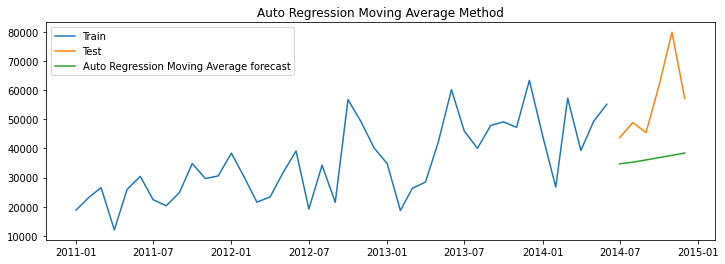

In [46]:
# Plotting forecasts made by ARMA model.

plt.figure(figsize = (12,4))

plt.plot(train['Sales'], label = 'Train')

plt.plot(test['Sales'], label = 'Test')

plt.plot(y_pred['Forecast'][test.index.min():], label = 'Auto Regression Moving Average forecast')

plt.legend(loc = 'best')

plt.title('Auto Regression Moving Average Method')

plt.show()

In [47]:
# Calculating RMSE and MAPE.

rmse = np.sqrt(mean_squared_error(test['Sales'], y_pred['Forecast'][test.index.min():])).round(2)

mape = np.round(np.mean(np.abs(test['Sales']-y_pred['Forecast'][test.index.min():])/test['Sales'])*100,2)

model_results = pd.DataFrame({'Method':['Auto Regression Moving Average'], 'MAPE':[mape], 'RMSE':[rmse]})

results = pd.concat([results, model_results])

results = results[['Method', 'RMSE', 'MAPE']]

results

,Method,RMSE,MAPE
0,Auto Regression,10985.28,13.56
0,Moving Average,23360.02,33.93
0,Auto Regression Moving Average,22654.32,32.40


### **Auto Regressive Integrated Moving Average Model (ARIMA)**

In [48]:
# Building ARIMA model.

model = ARIMA(boxcox_train, order = (1, 1, 1))

model_fit = model.fit()

print(model_fit.params)

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [49]:
# Making forecasts using ARIMA model.

y_pred = diff_df

y_pred['Prediction'] = model_fit.predict(diff_df.index.min(), diff_df.index.max())

y_pred['Prediction_cumsum'] = y_pred['Prediction'].cumsum()

y_pred['Prediction_cumsum'] = y_pred['Prediction_cumsum'].add(boxcox_df[0])

y_pred['Forecast'] = np.exp(y_pred['Prediction_cumsum'])

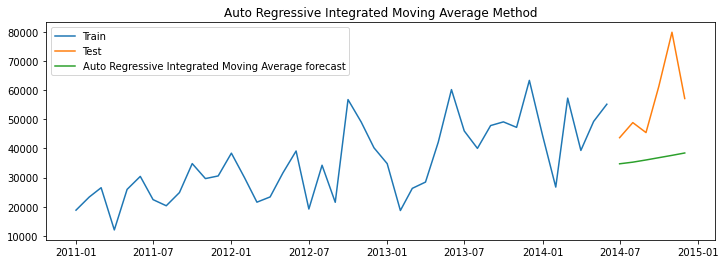

In [50]:
# Plotting forecasts made by ARIMA model.

plt.figure(figsize = (12,4))

plt.plot(train['Sales'], label = 'Train')

plt.plot(test['Sales'], label = 'Test')

plt.plot(y_pred['Forecast'][test.index.min():], label = 'Auto Regressive Integrated Moving Average forecast')

plt.legend(loc = 'best')

plt.title('Auto Regressive Integrated Moving Average Method')

plt.show()

In [51]:
# Calculating RMSE and MAPE.

rmse = np.sqrt(mean_squared_error(test['Sales'], y_pred['Forecast'][test.index.min():])).round(2)

mape = np.round(np.mean(np.abs(test['Sales']-y_pred['Forecast'][test.index.min():])/test['Sales'])*100,2)

model_results = pd.DataFrame({'Method':['Auto Regressive Integrated Moving Average'], 'MAPE':[mape], 'RMSE':[rmse]})

results = pd.concat([results, model_results])

results = results[['Method', 'RMSE', 'MAPE']]

results

,Method,RMSE,MAPE
0,Auto Regression,10985.28,13.56
0,Moving Average,23360.02,33.93
0,Auto Regression Moving Average,22654.32,32.40
0,Auto Regressive Integrated Moving Average,22654.32,32.40


### **Seasonal Auto Regressive Integrated Moving Average Model (SARIMA)**

In [54]:
# Building SARIMA model.

model = SARIMAX(boxcox_train, order = (1, 1, 1), seasonal_order = (1, 1, 1, 12)) 

model_fit = model.fit()

print(model_fit.params)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ar.L1      -0.041812
ma.L1      -0.996436
ar.S.L12    0.100215
ma.S.L12   -0.966596
sigma2      0.058595
dtype: float64


In [55]:
# Making forecasts using SARIMA model.

y_pred = diff_df

y_pred['Prediction'] = model_fit.predict(diff_df.index.min(), diff_df.index.max())

y_pred['Forecast'] = np.exp(y_pred['Prediction'])

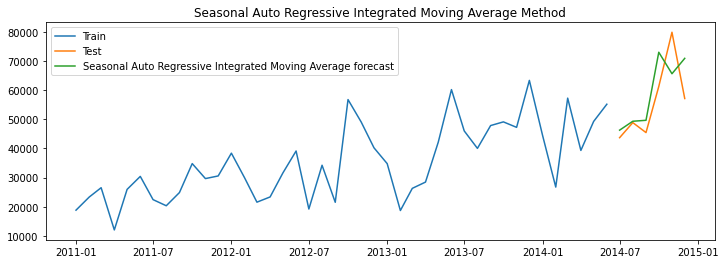

In [56]:
# Plotting forecasts made by SARIMA model.

plt.figure(figsize = (12,4))

plt.plot(train['Sales'], label = 'Train')

plt.plot(test['Sales'], label = 'Test')

plt.plot(y_pred['Forecast'][test.index.min():], label = 'Seasonal Auto Regressive Integrated Moving Average forecast')

plt.legend(loc = 'best')

plt.title('Seasonal Auto Regressive Integrated Moving Average Method')

plt.show()

In [57]:
# Calculating RMSE and MAPE.

rmse = np.sqrt(mean_squared_error(test['Sales'], y_pred['Forecast'][test.index.min():])).round(2)

mape = np.round(np.mean(np.abs(test['Sales']-y_pred['Forecast'][test.index.min():])/test['Sales'])*100,2)

model_results = pd.DataFrame({'Method':['Seasonal Auto Regressive Integrated Moving Average'], 'MAPE': [mape], 'RMSE': [rmse]})

results = pd.concat([results, model_results])

results = results[['Method', 'RMSE', 'MAPE']]

results

,Method,RMSE,MAPE
0,Auto Regression,10985.28,13.56
0,Moving Average,23360.02,33.93
0,Auto Regression Moving Average,22654.32,32.40
0,Auto Regressive Integrated Moving Average,22654.32,32.40
0,Seasonal Auto Regressive Integrated Moving Ave...,9619.66,12.88


RMSE and MAPE for SARIMA are less and hence forecast made by SARIMA is best when compared to other methods.

### **Forecasting Demand for APAC Consumer**

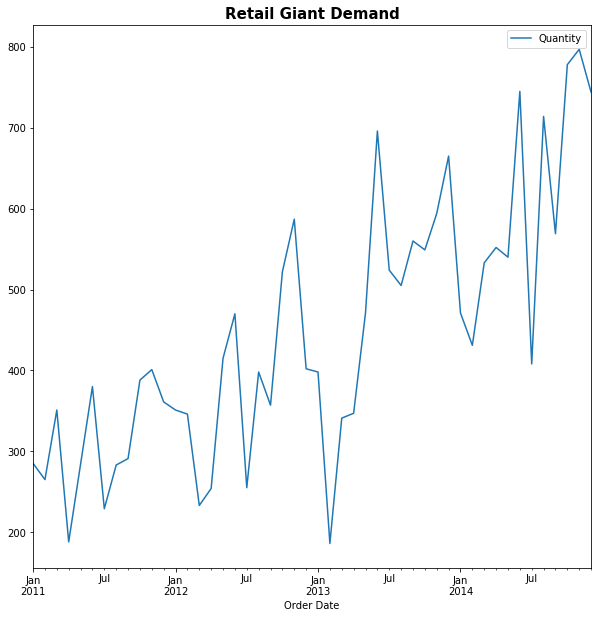

In [58]:
# Visualize the time series.

APAC_consumer_quantity.plot(figsize = (10, 10))

plt.legend(loc = 'best')

plt.title('Retail Giant Demand', fontweight = 'bold', size = 15)

plt.show(block = False)

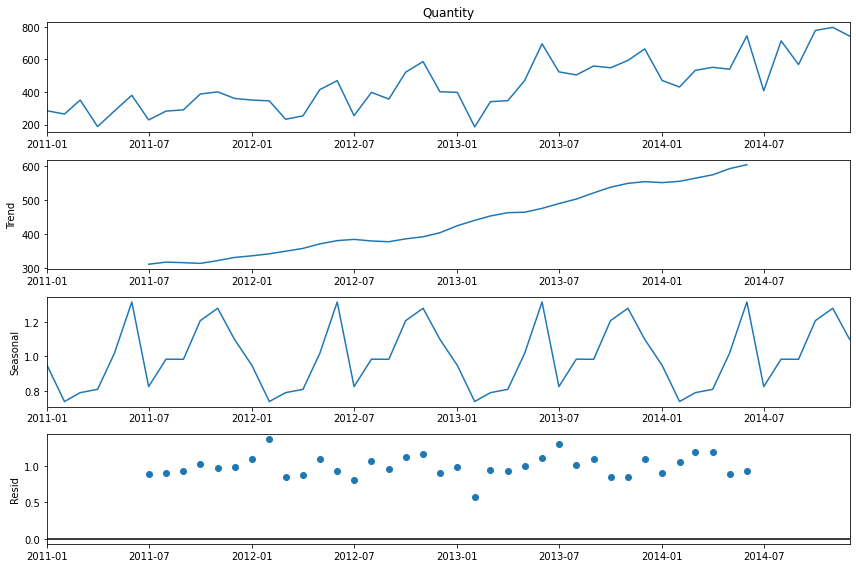

In [59]:
# Decomposing the time series.

rcParams['figure.figsize'] = 12, 8

decomposition = sm.tsa.seasonal_decompose(APAC_consumer_quantity.Quantity, model = 'multiplicative') 

fig = decomposition.plot()

plt.show()

In [60]:
# Splitting data into train and test data.

train = APAC_consumer_quantity.head(42)

test = APAC_consumer_quantity.tail(6)

In [61]:
# Checking for stationarity.

test_adf = adfuller(APAC_consumer['Quantity'])

print('ADF Statistic: %f' % test_adf[0])

print('Critical Values @ 0.05: %.2f' % test_adf[4]['5%'])

print('p-value: %f' % test_adf[1]) 

# Series is stationary.

ADF Statistic: -76.414945
Critical Values @ 0.05: -2.86
p-value: 0.000000


In [62]:
# Checking for stationarity.

test_kpss = kpss(APAC_consumer_quantity['Quantity'])

print('KPSS Statistic: %f' % test_kpss[0])

print('Critical Values @ 0.05: %.2f' % test_kpss[3]['5%'])

print('p-value: %f' % test_kpss[1])

# Series is not stationary.

KPSS Statistic: 0.566625
Critical Values @ 0.05: 0.46
p-value: 0.026661


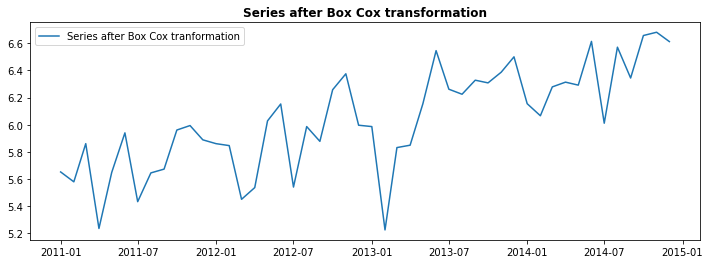

In [64]:
# Box-Cox Transformation.

boxcox_df = pd.Series(boxcox(APAC_consumer_quantity['Quantity'], lmbda = 0), index = APAC_consumer_quantity.index)

plt.figure(figsize = (12,4))

plt.plot(boxcox_df, label = 'Series after Box Cox tranformation')

plt.legend(loc = 'best')

plt.title('Series after Box Cox transformation', fontweight = 'bold')

plt.show()


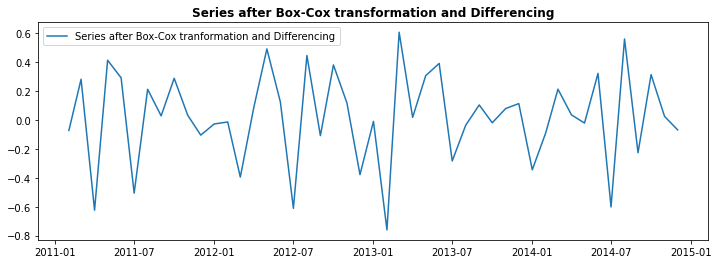

In [65]:
# Differencing the series.

diff_df = pd.Series(boxcox_df - boxcox_df.shift(), APAC_consumer_quantity.index)

plt.figure(figsize = (12,4))

plt.plot(diff_df, label = 'Series after Box-Cox tranformation and Differencing')

plt.legend(loc = 'best')

plt.title('Series after Box-Cox transformation and Differencing', fontweight = 'bold')

plt.show()

In [66]:
# Checking for missing values.

diff_df.isnull().sum()

1

In [67]:
# Removing missing values.

diff_df.dropna(inplace = True)

In [68]:
# Converting series to dataframe.

diff_df = diff_df.to_frame()

In [69]:
# Checking for stationarity.

test_adf = adfuller(diff_df)

print('ADF Statistic: %f' % test_adf[0])

print('Critical Values @ 0.05: %.2f' % test_adf[4]['5%'])

print('p-value: %f' % test_adf[1]) 

# The series is stationary.

ADF Statistic: -4.750940
Critical Values @ 0.05: -2.95
p-value: 0.000067


In [70]:
# Checking for stationarity.

test_kpss = kpss(diff_df)

print('KPSS Statistic: %f' % test_kpss[0])

print('Critical Values @ 0.05: %.2f' % test_kpss[3]['5%'])

print('p-value: %f' % test_kpss[1]) 

# The series is stationary.

KPSS Statistic: 0.181841
Critical Values @ 0.05: 0.46
p-value: 0.100000


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


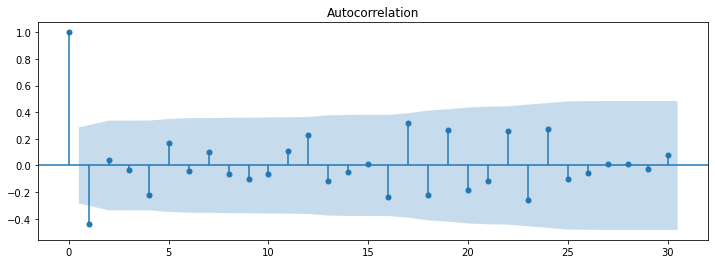

In [71]:
# Plotting Autocorrelation plot.

plt.figure(figsize = (12,4))

plot_acf(diff_df, ax = plt.gca(), lags = 30)

plt.show()

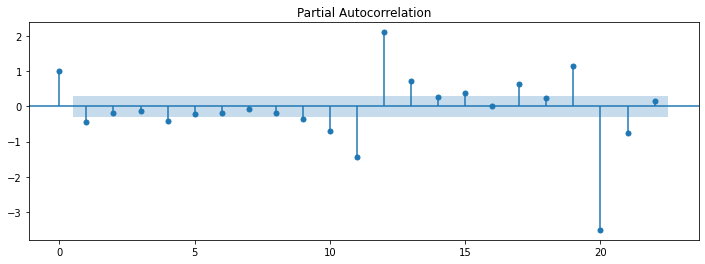

In [72]:
# Plotting Partial autocorrelation plot.

plt.figure(figsize = (12,4))

plot_pacf(diff_df, ax = plt.gca(), lags = 22)

plt.show()

In [73]:
# Splitting data into train and test.

boxcox_train = boxcox_df.head(42)

boxcox_test = boxcox_df.tail(6)

diff_train = diff_df.head(41)

diff_test = diff_df.head(6)

### **Auto Regression Model (AR)**

In [74]:
# Building AR model.

model = ARIMA(diff_train, order = (1, 0, 0)) 

model_fit = model.fit()

print(model_fit.params)

const      0.022149
ar.L1.0   -0.347371
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [75]:
# Making forecasts using AR model.

y_pred = diff_df

y_pred['Prediction'] = model_fit.predict(diff_df.index.min(), diff_df.index.max())

y_pred['Prediction_cumsum'] = y_pred['Prediction'].cumsum()

y_pred['Prediction_cumsum'] = y_pred['Prediction_cumsum'].add(boxcox_df[0])

y_pred['Forecast'] = np.exp(y_pred['Prediction_cumsum'])

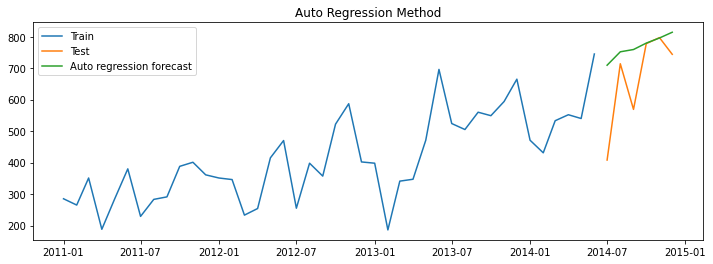

In [76]:
# Plotting forecasts made by AR model.

plt.figure(figsize = (12,4))

plt.plot(train['Quantity'], label = 'Train')

plt.plot(test['Quantity'], label = 'Test')

plt.plot(y_pred['Forecast'][test.index.min():], label = 'Auto regression forecast')

plt.legend(loc = 'best')

plt.title('Auto Regression Method')

plt.show()

In [77]:
# Calculating RMSE and MAPE.

rmse = np.sqrt(mean_squared_error(test['Quantity'], y_pred['Forecast'][test.index.min():])).round(2)

mape = np.round(np.mean(np.abs(test['Quantity']-y_pred['Forecast'][test.index.min():])/test['Quantity'])*100,2)

results = pd.DataFrame({'Method':['Auto Regression'], 'MAPE':[mape], 'RMSE':[rmse]})

results = results[['Method', 'RMSE', 'MAPE']]

results

,Method,RMSE,MAPE
0,Auto Regression,149.1,20.4


### **Moving Average Model (MA)**

In [78]:
# Building MA model.

model = ARIMA(diff_train, order = (0, 0, 1))

model_fit = model.fit()

print(model_fit.params)

const      0.020103
ma.L1.0   -1.000000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [79]:
# Making forecasts using MA model.

y_pred = diff_df

y_pred['Prediction'] = model_fit.predict(diff_df.index.min(), diff_df.index.max())

y_pred['Prediction_cumsum'] = y_pred['Prediction'].cumsum()

y_pred['Prediction_cumsum'] = y_pred['Prediction_cumsum'].add(boxcox_df[0])

y_pred['Forecast'] = np.exp(y_pred['Prediction_cumsum'])

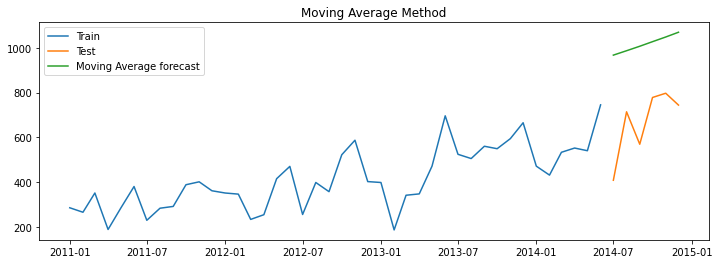

In [80]:
# Plotting forcasts made by MA model.

plt.figure(figsize = (12,4))

plt.plot(train['Quantity'], label = 'Train')

plt.plot(test['Quantity'], label = 'Test')

plt.plot(y_pred['Forecast'][test.index.min():], label = 'Moving Average forecast')

plt.legend(loc = 'best')

plt.title('Moving Average Method')

plt.show()

In [81]:
# Calculating RMSE and MAPE.

rmse = np.sqrt(mean_squared_error(test['Quantity'], y_pred['Forecast'][test.index.min():])).round(2)

mape = np.round(np.mean(np.abs(test['Quantity']-y_pred['Forecast'][test.index.min():])/test['Quantity'])*100,2)

model_results = pd.DataFrame({'Method':['Moving Average'], 'MAPE':[mape], 'RMSE':[rmse]})

results = pd.concat([results, model_results])

results = results[['Method', 'RMSE', 'MAPE']]

results

,Method,RMSE,MAPE
0,Auto Regression,149.10,20.40
0,Moving Average,367.56,59.94


### **Auto Regressive Moving Average Model (ARMA)**

In [82]:
# Building ARMA model.

model = ARIMA(diff_train, order = (1, 0, 1))

model_fit = model.fit()

print(model_fit.params)

const      0.020217
ar.L1.0    0.196918
ma.L1.0   -1.000000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [83]:
# Making forecasts using ARMA model.

y_pred = diff_df

y_pred['Prediction'] = model_fit.predict(diff_df.index.min(), diff_df.index.max())

y_pred['Prediction_cumsum'] = y_pred['Prediction'].cumsum()

y_pred['Prediction_cumsum'] = y_pred['Prediction_cumsum'].add(boxcox_df[0])

y_pred['Forecast'] = np.exp(y_pred['Prediction_cumsum'])

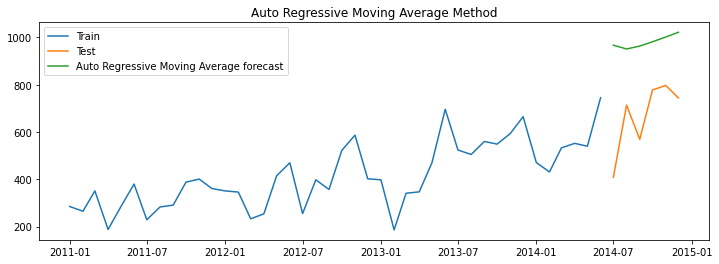

In [84]:
# Plotting forecasts made by ARMA model.

plt.figure(figsize = (12,4))

plt.plot(train['Quantity'], label = 'Train')

plt.plot(test['Quantity'], label = 'Test')

plt.plot(y_pred['Forecast'][test.index.min():], label = 'Auto Regressive Moving Average forecast')

plt.legend(loc = 'best')

plt.title('Auto Regressive Moving Average Method')

plt.show()

In [85]:
# Calculating RMSE and MAPE.

rmse = np.sqrt(mean_squared_error(test['Quantity'], y_pred['Forecast'][test.index.min():])).round(2)

mape = np.round(np.mean(np.abs(test['Quantity']-y_pred['Forecast'][test.index.min():])/test['Quantity'])*100,2)

model_results = pd.DataFrame({'Method':['Auto Regressive Moving Average'], 'MAPE':[mape], 'RMSE':[rmse]})

results = pd.concat([results, model_results])

results = results[['Method', 'RMSE', 'MAPE']]

results

,Method,RMSE,MAPE
0,Auto Regression,149.10,20.40
0,Moving Average,367.56,59.94
0,Auto Regressive Moving Average,338.04,54.82


### **Auto Regressive Integrated Moving Average Model (ARIMA)**

In [86]:
# Building ARIMA model.

model = ARIMA(boxcox_train, order = (1, 1, 1))

model_fit = model.fit()

print(model_fit.params)

const        0.020217
ar.L1.D.y    0.196918
ma.L1.D.y   -1.000000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [87]:
# Making forecasts using ARIMA model.

y_pred = diff_df

y_pred['Prediction'] = model_fit.predict(diff_df.index.min(), diff_df.index.max())

y_pred['Prediction_cumsum'] = y_pred['Prediction'].cumsum()

y_pred['Prediction_cumsum'] = y_pred['Prediction_cumsum'].add(boxcox_df[0])

y_pred['Forecast'] = np.exp(y_pred['Prediction_cumsum'])

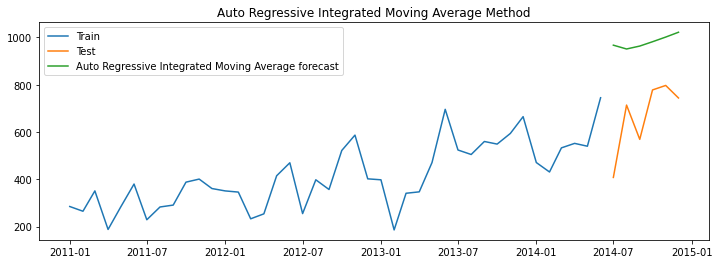

In [88]:
# Plotting forecasts made by ARIMA model.

plt.figure(figsize = (12,4))

plt.plot(train['Quantity'], label = 'Train')

plt.plot(test['Quantity'], label = 'Test')

plt.plot(y_pred['Forecast'][test.index.min():], label = 'Auto Regressive Integrated Moving Average forecast')

plt.legend(loc = 'best')

plt.title('Auto Regressive Integrated Moving Average Method')

plt.show()

In [89]:
# Calculating RMSE and MAPE.

rmse = np.sqrt(mean_squared_error(test['Quantity'], y_pred['Forecast'][test.index.min():])).round(2)

mape = np.round(np.mean(np.abs(test['Quantity']-y_pred['Forecast'][test.index.min():])/test['Quantity'])*100,2)

model_results = pd.DataFrame({'Method':['Auto Regressive Integrated Moving Average'], 'MAPE':[mape], 'RMSE':[rmse]})

results = pd.concat([results, model_results])

results = results[['Method', 'RMSE', 'MAPE']]

results

,Method,RMSE,MAPE
0,Auto Regression,149.10,20.40
0,Moving Average,367.56,59.94
0,Auto Regressive Moving Average,338.04,54.82
0,Auto Regressive Integrated Moving Average,338.04,54.82


### **Seasonal Auto Regressive Integrated Moving Average Model (SARIMA)**

In [90]:
# Building SARIMA model.

model = SARIMAX(boxcox_train, order = (0, 1, 1), seasonal_order = (2, 1, 0, 12)) 

model_fit = model.fit()

print(model_fit.params)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ma.L1      -0.969364
ar.S.L12   -0.652874
ar.S.L24   -0.595967
sigma2      0.040105
dtype: float64


In [91]:
# Making forecasts using SARIMA model.

y_pred = diff_df

y_pred['Prediction'] = model_fit.predict(diff_df.index.min(), diff_df.index.max())

y_pred['Forecast'] = np.exp(y_pred['Prediction'])

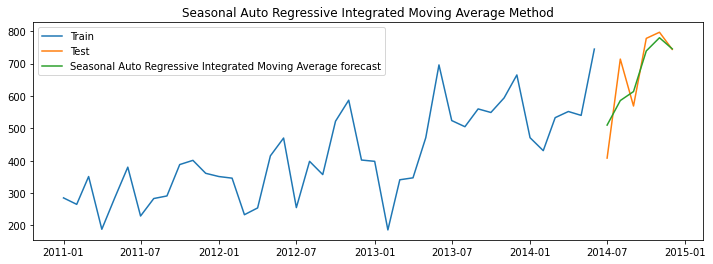

In [92]:
# Plotting forecasts made by SARIMA model.

plt.figure(figsize = (12,4))

plt.plot(train['Quantity'], label = 'Train')

plt.plot(test['Quantity'], label = 'Test')

plt.plot(y_pred['Forecast'][test.index.min():], label = 'Seasonal Auto Regressive Integrated Moving Average forecast')

plt.legend(loc = 'best')

plt.title('Seasonal Auto Regressive Integrated Moving Average Method')

plt.show()

In [93]:
# Calculating RMSE and MAPE.

rmse = np.sqrt(mean_squared_error(test['Quantity'], y_pred['Forecast'][test.index.min():])).round(2)

mape = np.round(np.mean(np.abs(test['Quantity']-y_pred['Forecast'][test.index.min():])/test['Quantity'])*100,2)

model_results = pd.DataFrame({'Method':['Seasonal Auto Regressive Integrated Moving Average'], 'MAPE':[mape], 'RMSE':[rmse]})

results = pd.concat([results, model_results])

results = results[['Method', 'RMSE', 'MAPE']]

results

,Method,RMSE,MAPE
0,Auto Regression,149.10,20.40
0,Moving Average,367.56,59.94
0,Auto Regressive Moving Average,338.04,54.82
0,Auto Regressive Integrated Moving Average,338.04,54.82
0,Seasonal Auto Regressive Integrated Moving Ave...,71.43,9.69


Forecast made by SARIMA method is best.

**Conclusion:**

Out of all methods, SARIMA method is able to predict the sales closer to the actual values. Hence forecast made by SARIMA method is best for the given time series data.